<a href="https://colab.research.google.com/github/astrrr/ML-Lab/blob/main/Activity10_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [621]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import glob
from scipy import stats
import datetime as dt
from sklearn import preprocessing

# LSTM

# 10.1 Data Preparation

* 8.1(a)

In [622]:
# Load data from csv 3 files
# acceleration.txt, heartrate.txt, labeled_sleep.txt
ACC = pd.read_csv('/content/46343_acceleration.txt', sep = ' ',names=['timedelta', 'accX', 'accY', 'accZ'])
HeartR = pd.read_csv('/content/46343_heartrate.txt', sep = ',',names=['timedelta', 'heartrate'])
SleepL = pd.read_csv('/content/46343_labeled_sleep.txt', sep = ' ',names=['timedelta', 'sleep'])


In [623]:
# Check ‘timedelta’ max(), min() of ACC, HeartR, SleepL (ช่วงเวลาที่มีข้อมูลใกล้กัน)
# Ex
max_list = []
min_list = []
ACC_max_date = ACC['timedelta'].max()
ACC_min_date = ACC['timedelta'].min()

HeartR_max_date = HeartR['timedelta'].max()
HeartR_min_date = HeartR['timedelta'].min()

SleepL_max_date = SleepL['timedelta'].max()
SleepL_min_date = SleepL['timedelta'].min()

max_list.append(ACC_max_date)
max_list.append(HeartR_max_date)
max_list.append(SleepL_max_date)

min_list.append(ACC_min_date)
min_list.append(HeartR_min_date)
min_list.append(SleepL_min_date)

In [624]:
print(f'ACC min//max : {ACC_min_date} // {ACC_max_date}')
print(f'HeartR min//max : {HeartR_min_date} // {HeartR_max_date}')
print(f'SleepL min//max : {SleepL_min_date} // {SleepL_max_date}')

ACC min//max : -124489.16105 // 17643.046417
HeartR min//max : -556410.36066 // 16980.47229
SleepL min//max : 0 // 16980


In [625]:
# หา start_timedelta, end_timedelta
start_timedelta = np.array(min_list).max()
end_timedelta = np.array(max_list).min()

In [626]:
print('start_timedelta : ',start_timedelta)
print('end_timedelta   : ',end_timedelta)

start_timedelta :  0.0
end_timedelta   :  16980.0


In [627]:
# select only intersected timedelta (ACC, HeartR, SleepL) (ช่วงเวลาที่มีข้อมูลใกล้กัน)

ACC_new = ACC[(ACC['timedelta'] > start_timedelta) &(ACC['timedelta'] < end_timedelta)]
HeartR_new = HeartR[(HeartR['timedelta'] > start_timedelta) &(HeartR['timedelta'] < end_timedelta)]
SleepL_new = SleepL[(SleepL['timedelta'] > start_timedelta) &(SleepL['timedelta'] < end_timedelta)]

In [628]:
ACC_new

,timedelta,accX,accY,accZ
98777,0.000721,-0.234650,0.905975,0.362747
98778,0.017162,-0.231232,0.893265,0.371613
98779,0.037183,-0.227814,0.915848,0.369049
98780,0.057108,-0.240524,0.919159,0.352890
98781,0.076929,-0.240448,0.889175,0.350143
...,...,...,...,...
948796,16979.905934,-0.442413,-0.527573,0.723450
948797,16979.925889,-0.441925,-0.527573,0.721985
948798,16979.945849,-0.441437,-0.526108,0.721985
948799,16979.965927,-0.443405,-0.525116,0.723434


In [629]:
HeartR_new

,timedelta,heartrate
1576,8.47840,97
1577,13.47840,95
1578,18.47840,96
1579,19.47840,95
1580,24.47840,95
...,...,...
4872,16954.47226,73
4873,16959.47229,72
4874,16964.47229,74
4875,16970.47229,75


In [630]:
SleepL_new

,timedelta,sleep
1,30,-1
2,60,-1
3,90,-1
4,120,-1
5,150,-1
...,...,...
561,16830,0
562,16860,0
563,16890,0
564,16920,0


* 8.1(b)

In [631]:
from pandas.tseries.offsets import *
# ------------ Rounding ACC (Rounding to 1 sec) -------------------------------
# Convert to datetime and round to second,
ACC_new['timedelta'] = pd.DataFrame(pd.to_timedelta(ACC_new['timedelta'], unit='s').round('1s'))
HeartR_new['timedelta'] = pd.DataFrame(pd.to_timedelta(HeartR_new['timedelta'], unit='s').round('1s'))
SleepL_new['timedelta'] = pd.DataFrame(pd.to_timedelta(SleepL_new['timedelta'], unit='s').round('1s'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [632]:
ACC_new

,timedelta,accX,accY,accZ
98777,0 days 00:00:00,-0.234650,0.905975,0.362747
98778,0 days 00:00:00,-0.231232,0.893265,0.371613
98779,0 days 00:00:00,-0.227814,0.915848,0.369049
98780,0 days 00:00:00,-0.240524,0.919159,0.352890
98781,0 days 00:00:00,-0.240448,0.889175,0.350143
...,...,...,...,...
948796,0 days 04:43:00,-0.442413,-0.527573,0.723450
948797,0 days 04:43:00,-0.441925,-0.527573,0.721985
948798,0 days 04:43:00,-0.441437,-0.526108,0.721985
948799,0 days 04:43:00,-0.443405,-0.525116,0.723434


In [633]:
HeartR_new

,timedelta,heartrate
1576,0 days 00:00:08,97
1577,0 days 00:00:13,95
1578,0 days 00:00:18,96
1579,0 days 00:00:19,95
1580,0 days 00:00:24,95
...,...,...
4872,0 days 04:42:34,73
4873,0 days 04:42:39,72
4874,0 days 04:42:44,74
4875,0 days 04:42:50,75


In [634]:
SleepL_new

,timedelta,sleep
1,0 days 00:00:30,-1
2,0 days 00:01:00,-1
3,0 days 00:01:30,-1
4,0 days 00:02:00,-1
5,0 days 00:02:30,-1
...,...,...
561,0 days 04:40:30,0
562,0 days 04:41:00,0
563,0 days 04:41:30,0
564,0 days 04:42:00,0


In [635]:
# Average rounding duplicated time
df_acc_X = ACC_new.groupby('timedelta')['accX'].mean().reset_index()
df_acc_Y = ACC_new.groupby('timedelta')['accY'].mean().reset_index()
df_acc_Z = ACC_new.groupby('timedelta')['accZ'].mean().reset_index()

In [636]:
result = pd.merge(df_acc_X, df_acc_Y, on=["timedelta"])
result = pd.merge(result, df_acc_Z, on=["timedelta"])
acc_xyz = result

In [637]:
acc_xyz

,timedelta,accX,accY,accZ
0,0 days 00:00:00,-0.243203,0.895372,0.367591
1,0 days 00:00:01,-0.240757,0.873826,0.415446
2,0 days 00:00:02,-0.244620,0.883943,0.387026
3,0 days 00:00:03,-0.248036,0.902427,0.347812
4,0 days 00:00:04,-0.241778,0.912946,0.321502
...,...,...,...,...
16976,0 days 04:42:56,-0.442763,-0.525892,0.722950
16977,0 days 04:42:57,-0.441990,-0.525476,0.723410
16978,0 days 04:42:58,-0.441581,-0.525116,0.724003
16979,0 days 04:42:59,-0.442283,-0.525849,0.723265


* **before / after**

In [638]:
print('--------------------Before convert date time and round and AVG to 1s-------------')
print(ACC[0:5])
print('--------------------After convert date time and round and AVG to 1s-------------')
print(acc_xyz[0:5])

--------------------Before convert date time and round and AVG to 1s-------------
       timedelta      accX      accY      accZ
0 -124489.161050  0.017487 -0.586700 -0.805771
1 -124489.116395  0.018982 -0.589676 -0.809158
2 -124489.115548  0.020966 -0.580887 -0.815048
3 -124489.114691  0.019485 -0.580872 -0.813583
4 -124489.097700  0.016998 -0.587204 -0.806259
--------------------After convert date time and round and AVG to 1s-------------
        timedelta      accX      accY      accZ
0 0 days 00:00:00 -0.243203  0.895372  0.367591
1 0 days 00:00:01 -0.240757  0.873826  0.415446
2 0 days 00:00:02 -0.244620  0.883943  0.387026
3 0 days 00:00:03 -0.248036  0.902427  0.347812
4 0 days 00:00:04 -0.241778  0.912946  0.321502


* 8.1(c)

In [639]:
# ------------ Rounding Heart Rate (Rounding to 1 sec) -------------------------------
# Resampling every 1s with median with ffill
resample_rule = '1s'
HeartR_new2 = HeartR_new.set_index('timedelta').resample(resample_rule,).median().ffill()

In [640]:
HeartR_new2

,heartrate
timedelta,
0 days 00:00:08,97.0
0 days 00:00:09,97.0
0 days 00:00:10,97.0
0 days 00:00:11,97.0
0 days 00:00:12,97.0
...,...
0 days 04:42:51,75.0
0 days 04:42:52,75.0
0 days 04:42:53,75.0


* 8.1(d)

In [641]:
# Resampling every 1s with median with ffill
resample_rule = '1s'
SleepL_new2 = SleepL_new.set_index('timedelta').resample(resample_rule,).median().ffill()

In [642]:
SleepL_new2

,sleep
timedelta,
0 days 00:00:30,-1.0
0 days 00:00:31,-1.0
0 days 00:00:32,-1.0
0 days 00:00:33,-1.0
0 days 00:00:34,-1.0
...,...
0 days 04:42:26,0.0
0 days 04:42:27,0.0
0 days 04:42:28,0.0


*  8.1 (e) Merge Data and Standardized data

In [643]:
# ------------Merge All Data -------------------------------
df = []
df = pd.merge_asof(acc_xyz, HeartR_new2, on='timedelta')
df = pd.merge_asof(df, SleepL_new2, on = 'timedelta')

In [644]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16981 entries, 0 to 16980
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   timedelta  16981 non-null  timedelta64[ns]
 1   accX       16981 non-null  float64        
 2   accY       16981 non-null  float64        
 3   accZ       16981 non-null  float64        
 4   heartrate  16973 non-null  float64        
 5   sleep      16951 non-null  float64        
dtypes: float64(5), timedelta64[ns](1)
memory usage: 928.6 KB


In [645]:
# Fill NA
# Heart rate
median = df['heartrate'].median()
df["heartrate"].fillna(median, inplace = True)

In [646]:
# Sleep Label
# Fillna() # with 0
df["sleep"].fillna(0, inplace = True)

In [647]:
df

,timedelta,accX,accY,accZ,heartrate,sleep
0,0 days 00:00:00,-0.243203,0.895372,0.367591,82.0,0.0
1,0 days 00:00:01,-0.240757,0.873826,0.415446,82.0,0.0
2,0 days 00:00:02,-0.244620,0.883943,0.387026,82.0,0.0
3,0 days 00:00:03,-0.248036,0.902427,0.347812,82.0,0.0
4,0 days 00:00:04,-0.241778,0.912946,0.321502,82.0,0.0
...,...,...,...,...,...,...
16976,0 days 04:42:56,-0.442763,-0.525892,0.722950,76.0,0.0
16977,0 days 04:42:57,-0.441990,-0.525476,0.723410,76.0,0.0
16978,0 days 04:42:58,-0.441581,-0.525116,0.724003,76.0,0.0
16979,0 days 04:42:59,-0.442283,-0.525849,0.723265,76.0,0.0


In [648]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16981 entries, 0 to 16980
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   timedelta  16981 non-null  timedelta64[ns]
 1   accX       16981 non-null  float64        
 2   accY       16981 non-null  float64        
 3   accZ       16981 non-null  float64        
 4   heartrate  16981 non-null  float64        
 5   sleep      16981 non-null  float64        
dtypes: float64(5), timedelta64[ns](1)
memory usage: 928.6 KB


In [649]:
# Drop column timedelta
df.drop(df.columns[0], axis =1 ,inplace=True)

In [650]:
df

,accX,accY,accZ,heartrate,sleep
0,-0.243203,0.895372,0.367591,82.0,0.0
1,-0.240757,0.873826,0.415446,82.0,0.0
2,-0.244620,0.883943,0.387026,82.0,0.0
3,-0.248036,0.902427,0.347812,82.0,0.0
4,-0.241778,0.912946,0.321502,82.0,0.0
...,...,...,...,...,...
16976,-0.442763,-0.525892,0.722950,76.0,0.0
16977,-0.441990,-0.525476,0.723410,76.0,0.0
16978,-0.441581,-0.525116,0.724003,76.0,0.0
16979,-0.442283,-0.525849,0.723265,76.0,0.0


In [651]:
# Standardized data
feature_columns = ['accX', 'accY', 'accZ', 'heartrate']
label_columns = ['sleep']
df_feature = df[feature_columns]  # standardized data of df_feature
df_label = df[label_columns]

In [652]:
df_feature

,accX,accY,accZ,heartrate
0,-0.243203,0.895372,0.367591,82.0
1,-0.240757,0.873826,0.415446,82.0
2,-0.244620,0.883943,0.387026,82.0
3,-0.248036,0.902427,0.347812,82.0
4,-0.241778,0.912946,0.321502,82.0
...,...,...,...,...
16976,-0.442763,-0.525892,0.722950,76.0
16977,-0.441990,-0.525476,0.723410,76.0
16978,-0.441581,-0.525116,0.724003,76.0
16979,-0.442283,-0.525849,0.723265,76.0


In [653]:
df_label

,sleep
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
16976,0.0
16977,0.0
16978,0.0
16979,0.0


In [654]:
# standardize data
X_scaler = preprocessing.StandardScaler()
X_tranfrom = X_scaler.fit_transform(df_feature)

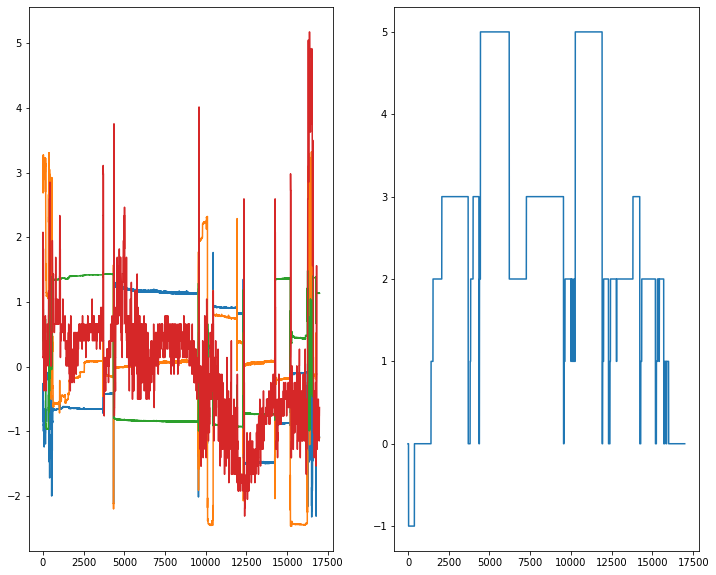

In [655]:
# Visualize signals
fig = plt.figure(figsize=(12,10))

fig.add_subplot(121)
plt.plot(X_tranfrom)

fig.add_subplot(122)
plt.plot(df_label)

plt.show()

# 10.1.2 Simple Moving Average (SMA) and Create 2D feature

In [656]:
# ------------Simple Moving Average (SMA) ------------------------------
#columns=['accX', 'accY', 'accZ', 'heartrate']
COLUMN_NAMES = [['accX', 'accY', 'accZ', 'heartrate']]
df_feature_SMA = pd.DataFrame(columns=COLUMN_NAMES)
df_feature_SMA['accX'] = df_feature['accX'].rolling(5, min_periods=1).mean()
df_feature_SMA['accY'] = df_feature['accY'].rolling(5, min_periods=1).mean()
df_feature_SMA['accZ'] = df_feature['accZ'].rolling(5, min_periods=1).mean()
df_feature_SMA['heartrate'] = df_feature['heartrate'].rolling(5, min_periods=1).mean()

In [657]:
df_feature

,accX,accY,accZ,heartrate
0,-0.243203,0.895372,0.367591,82.0
1,-0.240757,0.873826,0.415446,82.0
2,-0.244620,0.883943,0.387026,82.0
3,-0.248036,0.902427,0.347812,82.0
4,-0.241778,0.912946,0.321502,82.0
...,...,...,...,...
16976,-0.442763,-0.525892,0.722950,76.0
16977,-0.441990,-0.525476,0.723410,76.0
16978,-0.441581,-0.525116,0.724003,76.0
16979,-0.442283,-0.525849,0.723265,76.0


In [658]:
df_feature_SMA

,accX,accY,accZ,heartrate
0,-0.243203,0.895372,0.367591,82.0
1,-0.241980,0.884599,0.391519,82.0
2,-0.242860,0.884380,0.390021,82.0
3,-0.244154,0.888892,0.379469,82.0
4,-0.243679,0.893703,0.367876,82.0
...,...,...,...,...
16976,-0.442216,-0.525727,0.723527,75.4
16977,-0.442129,-0.525628,0.723509,75.6
16978,-0.442026,-0.525507,0.723589,75.8
16979,-0.442171,-0.525591,0.723433,76.0


In [659]:
df_label

,sleep
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
16976,0.0
16977,0.0
16978,0.0
16979,0.0


In [660]:
n_feature = 4

In [661]:
# ------------ 1D to 3D feature-------------------------------
# set sliding window parameter
df_feature2D = []
df_feature2D_T = []
df_feature2D_result =[]
df_feature2D_T_result =[]
df_label_new = []
slidingW = 100
stride_step = 5

for t in range( 0 , len(df_feature), stride_step):
  
  try:
    F2d = df_feature[ t : t + slidingW]
    
    
    df_feature2D.append(F2d)
    F2d_T = np.transpose(F2d)
    df_feature2D_T.append(F2d_T)
    
    df_feature2D = np.array(df_feature2D)
    df_feature2D.reshape(slidingW, n_feature)
    print(df_feature2D.shape)
    df_feature2D_result.append(df_feature2D)
    df_feature2D = []

    df_feature2D_T = np.array(df_feature2D_T)
    df_feature2D_T.reshape(n_feature, slidingW)
    print(df_feature2D_T.shape)
    df_feature2D_T_result.append(df_feature2D_T)
    df_feature2D_T = []

    Labels = stats.mode( df_label [ t : t+slidingW] )
    df_label_new.append(Labels)

    # df_feature3D.append(F3d)
    # df_feature3D = np.array(df_feature3D)
    # #df_feature3D = np.moveaxis(df_feature3D, 1, -1)
    # df_feature3D.reshape(slidingW, n_feature, 1)
    # #print(df_feature3D.shape)
    # #print(df_feature3D)
    # df_feature3D_result.append(df_feature3D)
    # df_feature3D = []
    # Labels = stats.mode( df_label[t : t+slidingW])
    # df_label_new.append(Labels)
  except ValueError as v:
    print(v)
  except AttributeError as a:
    print(a)

Streaming output truncated to the last 5000 lines.
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(1, 4, 100)
(1, 100, 4)
(

In [662]:
df_feature2D_result = np.array(df_feature2D_result)
df_feature2D_T_result = np.array(df_feature2D_T_result)
print(df_feature2D_result.shape)
print(df_feature2D_T_result.shape)

(3377, 1, 100, 4)
(3377, 1, 4, 100)


In [663]:
# remove axis 1 (3D->2D)
df_feature2D_result = np.squeeze(df_feature2D_result, axis=1)
df_feature2D_T_result = np.squeeze(df_feature2D_T_result, axis=1)
print(df_feature2D_result.shape)
print(df_feature2D_T_result.shape)

(3377, 100, 4)
(3377, 4, 100)


In [664]:
# prepare df_label
df_label_new2D = np.array(df_label_new)

In [665]:
df_y = []
for i in range(3377):
  if df_label_new2D[i][0] == -1:
    df_y.append(0)
  elif df_label_new2D[i][0] == 0:
    df_y.append(1)
  elif df_label_new2D[i][0] == 1:
    df_y.append(2)
  elif df_label_new2D[i][0] == 2:
    df_y.append(3)
  elif df_label_new2D[i][0] == 3:
    df_y.append(4)
  elif df_label_new2D[i][0] == 5:
    df_y.append(5)

In [666]:
df_y = np.array(df_y)

In [667]:
df_y.shape

(3377,)

# 10.1.3 Train Test Split

In [668]:
# ------------ Train-Test-Split 2D features -------------------------------
x_train, x_test, y_train, y_test = train_test_split( df_feature2D_result, df_y)

In [669]:
# ------------ Train-Test-Split 2D_T features -------------------------------
x_train_T, x_test_T, y_train_T, y_test_T = train_test_split( df_feature2D_T_result, df_y)

# 10.2 LSTM Model Training and Testing

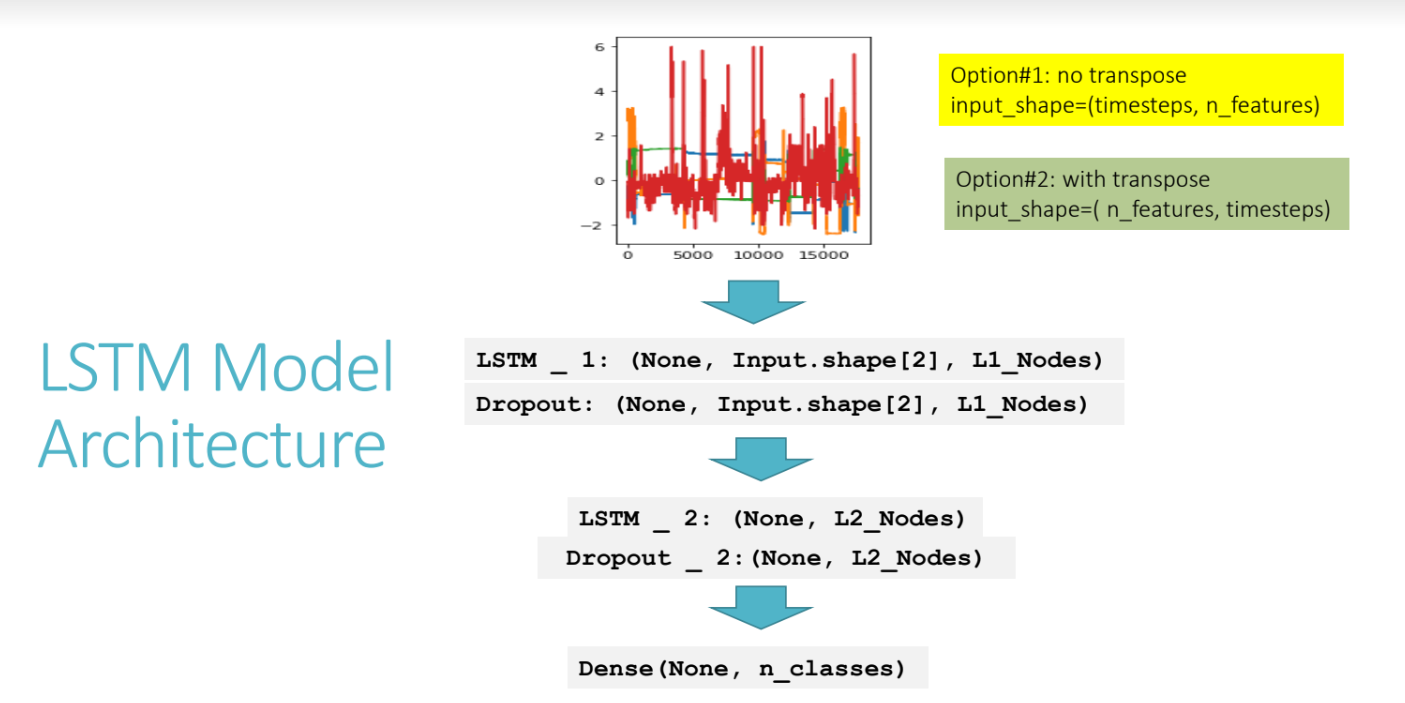

# 10.2.1 LSTM Model Parameters

In [670]:
# ------------ LSTM Architecture parameter -------------------------------

# try
#Option #1:
inRow = slidingW
inCol = n_feature 

# Option #2
inRow_T = n_feature
inCol_T = slidingW

# Nlayer (LSTM, dense), Nnode, Activation
LSTM_L1 = 100 # try 200, 300, 400, 500, 1000
LSTM_L2 = 50 # try 50, 100, 150, 200, 250, 300
dropRate_L1 = 0.25
dropRate_L2 = 0.5
D_out = 6
Activation = 'Softmax'
n_classes = 6
Input_shape = (inRow, inCol)
Input_shape_T = (inRow_T, inCol_T)

# 10.2.2 LSTM Model Train Test

In [671]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [672]:
# ------------ Create LSTM Model -------------------------------
model = Sequential()
model.add( LSTM ( LSTM_L1, return_sequences=True,
                  input_shape=Input_shape))
model.add(Dropout(dropRate_L1 ))
model.add(LSTM(LSTM_L2 ))
model.add(Dropout(dropRate_L2))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 100, 100)          42000     
                                                                 
 dropout_32 (Dropout)        (None, 100, 100)          0         
                                                                 
 lstm_33 (LSTM)              (None, 50)                30200     
                                                                 
 dropout_33 (Dropout)        (None, 50)                0         
                                                                 
 dense_16 (Dense)            (None, 6)                 306       
                                                                 
Total params: 72,506
Trainable params: 72,506
Non-trainable params: 0
_________________________________________________________________


In [673]:
# 2D_T
# ------------ Create LSTM Model -------------------------------
model2 = Sequential()
model2.add( LSTM ( LSTM_L1, return_sequences=True,
                  input_shape=Input_shape_T))
model2.add(Dropout(dropRate_L1 ))
model2.add(LSTM(LSTM_L2 ))
model2.add(Dropout(dropRate_L2))
model2.add(Dense(n_classes, activation='softmax'))
model2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 4, 100)            80400     
                                                                 
 dropout_34 (Dropout)        (None, 4, 100)            0         
                                                                 
 lstm_35 (LSTM)              (None, 50)                30200     
                                                                 
 dropout_35 (Dropout)        (None, 50)                0         
                                                                 
 dense_17 (Dense)            (None, 6)                 306       
                                                                 
Total params: 110,906
Trainable params: 110,906
Non-trainable params: 0
_________________________________________________________________


# 10.2.3 LSTM Model Train Test

In [674]:
# ------------ Create Optimizer -------------------------------
model.compile( optimizer='adam',
              #loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["acc"])

In [675]:
# ------ Train CNN using 2D feature--------------------------------------------
# Training the model
EP = 300
batch_size = 20 # try 20, 40, 60, 80, 100
history = model.fit( x_train, y_train, # try Option #1 และ Option #2
                      batch_size = batch_size,
                      validation_data=(x_test, y_test), epochs=EP)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


127/127 [==============================] - 5s 20ms/step - loss: 1.5564 - acc: 0.3511 - val_loss: 1.3652 - val_acc: 0.4935
Epoch 2/300
127/127 [==============================] - 1s 10ms/step - loss: 1.3165 - acc: 0.4435 - val_loss: 1.1257 - val_acc: 0.5562
Epoch 3/300
127/127 [==============================] - 1s 10ms/step - loss: 1.1834 - acc: 0.4870 - val_loss: 1.0613 - val_acc: 0.5645
Epoch 4/300
127/127 [==============================] - 1s 10ms/step - loss: 1.1246 - acc: 0.5221 - val_loss: 1.0296 - val_acc: 0.5988
Epoch 5/300
127/127 [==============================] - 1s 10ms/step - loss: 1.0943 - acc: 0.5419 - val_loss: 0.8854 - val_acc: 0.6320
Epoch 6/300
127/127 [==============================] - 1s 10ms/step - loss: 0.9836 - acc: 0.5746 - val_loss: 1.0175 - val_acc: 0.5456
Epoch 7/300
127/127 [==============================] - 1s 10ms/step - loss: 0.9586 - acc: 0.5829 - val_loss: 0.8374 - val_acc: 0.6237
Epoch 8/300
127/127 [==============================] - 1s 11ms/step - loss

In [676]:
# 2D_T
# ------------ Create Optimizer -------------------------------
model2.compile( optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["acc"])

In [677]:
# ------ Train CNN using 2DT feature--------------------------------------------
# Training the model
EP = 300
batch_size = 20 # try 20, 40, 60, 80, 100
history2 = model2.fit( x_train_T, y_train_T, # try Option #1 และ Option #2
                      batch_size = batch_size,
                      validation_data=(x_test_T, y_test_T), epochs=EP)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


127/127 [==============================] - 4s 11ms/step - loss: 1.4005 - acc: 0.4021 - val_loss: 1.1848 - val_acc: 0.5231
Epoch 2/300
127/127 [==============================] - 1s 5ms/step - loss: 1.2101 - acc: 0.4913 - val_loss: 1.0159 - val_acc: 0.5964
Epoch 3/300
127/127 [==============================] - 1s 6ms/step - loss: 1.0414 - acc: 0.5517 - val_loss: 0.8884 - val_acc: 0.6521
Epoch 4/300
127/127 [==============================] - 1s 6ms/step - loss: 0.9340 - acc: 0.6141 - val_loss: 0.8104 - val_acc: 0.6533
Epoch 5/300
127/127 [==============================] - 1s 6ms/step - loss: 0.8792 - acc: 0.6291 - val_loss: 0.7903 - val_acc: 0.6367
Epoch 6/300
127/127 [==============================] - 1s 6ms/step - loss: 0.8445 - acc: 0.6367 - val_loss: 0.7458 - val_acc: 0.6686
Epoch 7/300
127/127 [==============================] - 1s 5ms/step - loss: 0.8084 - acc: 0.6552 - val_loss: 0.7174 - val_acc: 0.7290
Epoch 8/300
127/127 [==============================] - 1s 6ms/step - loss: 0.787

# 10.3 LSTM Performance Measurement

In [678]:
#LSTM prediction for Option #1 and Option #2
LSTM_pred = model.predict(x_test)
LSTM_pred2 = model2.predict(x_test_T)

#Get classID from max prob(LSTM_pred)
df_pred = pd.DataFrame(LSTM_pred)
df_class = df_pred.idxmax(axis=1)  #axis 1 is column //0 is index

df_pred2 = pd.DataFrame(LSTM_pred2)
df_class2 = df_pred2.idxmax(axis=1)

In [679]:
df_pred

,0,1,2,3,4,5
0,7.553551e-07,3.383226e-08,0.000092,0.000063,0.000007,9.998379e-01
1,9.968745e-01,3.102974e-04,0.000165,0.000255,0.002025,3.702944e-04
2,4.948731e-07,9.868167e-01,0.000458,0.012722,0.000002,6.401896e-08
3,4.454786e-06,4.245928e-06,0.000004,0.084197,0.910744,5.045765e-03
4,5.580908e-05,4.461896e-03,0.000254,0.783576,0.211276,3.761561e-04
...,...,...,...,...,...,...
840,3.095931e-05,4.524407e-04,0.000083,0.329448,0.669048,9.371854e-04
841,1.358274e-05,1.865897e-04,0.000047,0.442761,0.551580,5.412051e-03
842,5.729877e-06,9.937332e-01,0.005671,0.000587,0.000003,8.428946e-08
843,9.946814e-01,3.252935e-04,0.000238,0.000968,0.003060,7.267916e-04


In [680]:
df_class

0      5
1      0
2      1
3      4
4      3
      ..
840    4
841    4
842    1
843    0
844    4
Length: 845, dtype: int64

In [681]:
df_pred2

,0,1,2,3,4,5
0,1.068238e-11,1.263874e-05,1.332276e-05,9.999721e-01,1.930684e-06,6.611957e-09
1,2.085761e-08,8.909224e-07,1.083061e-05,1.741253e-01,3.452072e-05,8.258284e-01
2,6.786749e-11,1.835550e-04,3.563208e-05,9.997784e-01,2.432397e-06,8.493200e-09
3,3.447730e-08,9.878649e-01,7.936604e-03,4.193045e-03,4.963093e-06,4.447019e-07
4,7.557432e-10,5.487179e-05,4.120741e-06,9.978274e-01,2.111844e-03,1.757048e-06
...,...,...,...,...,...,...
840,1.204513e-09,9.987596e-01,1.231255e-03,9.108143e-06,3.083198e-08,1.460684e-08
841,1.000000e+00,8.082891e-09,4.502326e-09,5.160757e-10,1.126384e-09,6.635714e-10
842,8.653916e-10,2.981673e-07,4.007916e-09,5.994202e-05,9.999398e-01,6.246491e-09
843,1.272917e-10,8.003793e-07,4.743797e-10,2.737724e-06,9.999964e-01,8.613981e-09


In [682]:
df_class2

0      3
1      5
2      3
3      1
4      3
      ..
840    1
841    0
842    4
843    4
844    4
Length: 845, dtype: int64

In [683]:

# ------------ View Confusion Matrix, Classification Report -------------------------------
# View Confusion Matrix and Classification Report
print('/******************************************************************************/')
print('/****************************-------- 2D -----*********************************/')
print('/******************************************************************************/')
print('Confusion Matrix of LSTMClassifier 2D : ')
print(confusion_matrix(y_test, df_class))

print('//////////////////////////////////////////////////////////////////')
print('Calassification report of LSTMClassifier 2D : ')
print(classification_report(y_test, df_class))

print('/******************************************************************************/')
print('/****************************------ 2D_T -----*********************************/')
print('/******************************************************************************/')
# 2D_T
print('Confusion Matrix of LSTMClassifier 2D_T : ')
print(confusion_matrix(y_test_T, df_class2))

print('//////////////////////////////////////////////////////////////////')
print('Calassification report of LSTMClassifier 2D_T : ')
print(classification_report(y_test_T, df_class2))


/******************************************************************************/
/****************************-------- 2D -----*********************************/
/******************************************************************************/
Confusion Matrix of LSTMClassifier 2D : 
[[ 12   0   0   0   0   0]
 [  0  91   7  13   0   0]
 [  0   3  35   7   2   0]
 [  0   1   6 218  19   2]
 [  0   0   0  27 231   0]
 [  0   0   0  31   5 135]]
//////////////////////////////////////////////////////////////////
Calassification report of LSTMClassifier 2D : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.96      0.82      0.88       111
           2       0.73      0.74      0.74        47
           3       0.74      0.89      0.80       246
           4       0.90      0.90      0.90       258
           5       0.99      0.79      0.88       171

    accuracy                           0.85       845
   ma

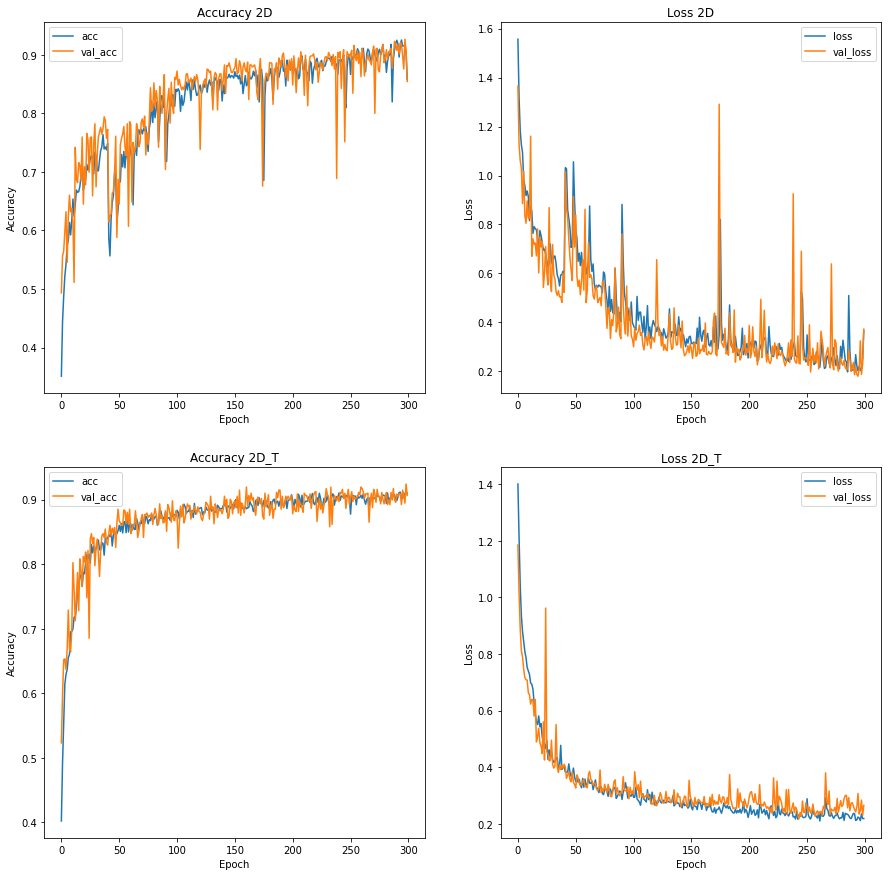

In [684]:
# ------ View History Graph -------------------------------------------
# View Accuracy Graph
# summarize history for accuracy
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(221)
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy 2D')
plt.legend()

fig.add_subplot(222)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss 2D')
plt.legend()

fig.add_subplot(223)
plt.plot(history2.history['acc'], label='acc')
plt.plot(history2.history['val_acc'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy 2D_T')
plt.legend()

fig.add_subplot(224)
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss 2D_T')
plt.legend()

plt.show()